In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats

### 1.（30%）使用pandas库的相关方法，进行数据集读取、信息处理和探索性分析。

#### Q1.（4%）读取数据集data.csv（将首列作为索引）至变量df，展示该数据集的前10行内容，并展示数据集有多少行和多少列。

In [40]:
file_path = 'data.csv'
df = pd.read_csv(file_path, index_col = 0)
print('前十行内容' + '-'*30)
print(df.head(10))
num_row, num_col = df.shape
print('行数/列数' + '-'*30)
print(num_row, num_col)


前十行内容------------------------------
    CNTRYID  CNT  CNTSCHID   CYC  NatCen  Region  STRATUM  SUBNATIO  OECD  \
1         8  ALB    800002  07MS     800     800  ALB0109     80000     0   
2         8  ALB    800003  07MS     800     800  ALB0109     80000     0   
3         8  ALB    800004  07MS     800     800  ALB0211     80000     0   
4         8  ALB    800005  07MS     800     800  ALB0107     80000     0   
5         8  ALB    800006  07MS     800     800  ALB0105     80000     0   
6         8  ALB    800007  07MS     800     800  ALB0109     80000     0   
7         8  ALB    800008  07MS     800     800  ALB0210     80000     0   
8         8  ALB    800009  07MS     800     800  ALB0203     80000     0   
9         8  ALB    800010  07MS     800     800  ALB0210     80000     0   
10        8  ALB    800011  07MS     800     800  ALB0206     80000     0   

    ADMINMODE  ...  EDUSHORT  STAFFSHORT  STUBEHA  TEACHBEHA  SCMCEG  \
1           2  ...    1.2478     -1.4551  -1

#### Q2.（4%）数据集存在很多缺失值，输出各列缺失值的个数，并删除数据集的最后一列。基于更新后的数据，展示哪一列的缺失值最多，哪些列没有缺失值。

In [41]:
print('各列缺失值'+'-'*30)
miss_value = df.isnull().sum()
print(miss_value)
last_col = df.columns[-1]
df.drop(last_col, axis=1, inplace=True)
print('-'*30)
print(f"已删除最后一列{last_col}")
miss_value = df.isnull().sum()
max_missing = miss_value.max()
col_max_missing = miss_value[miss_value == max_missing].index.tolist()
col_zero_missing = miss_value[miss_value == 0].index.tolist()
print(f"缺失值最多的列是{col_max_missing},缺失值是{max_missing}")
print(f"没有缺失值的列是{col_zero_missing}")

各列缺失值------------------------------
CNTRYID                 0
CNT                     0
CNTSCHID                0
CYC                     0
NatCen                  0
                    ...  
W_SCHGRNRABWT           0
W_FSTUWT_SCH_SUM        0
SENWT                   0
VER_DAT                 0
BOOKID              21903
Length: 197, dtype: int64
------------------------------
已删除最后一列BOOKID
缺失值最多的列是['SC160Q01WA'],缺失值是11450
没有缺失值的列是['CNTRYID', 'CNT', 'CNTSCHID', 'CYC', 'NatCen', 'Region', 'STRATUM', 'SUBNATIO', 'OECD', 'ADMINMODE', 'SC053D11TA', 'W_SCHGRNRABWT', 'W_FSTUWT_SCH_SUM', 'SENWT', 'VER_DAT']


#### Q3.（4%）数据集的有些列在所有记录上均有相同取值，作为独立的一列是相对冗余的。请查找并输出这些列的名称和取值，并阐述这些列代表的含义，最后删除这些列。
列代表的含义请见实验文档。

In [42]:
unique_count = df.nunique()
const_col = unique_count[unique_count == 1].index.tolist()
print('以下列的取值相同')
for col in const_col:
    const_value = df[col][1]
    print(f'列名:{col}, 取值:{const_value}')
for col in const_col:
    df.drop(col, axis=1, inplace=True)
print('-'*30)
print(f"已删除列{const_col}")

以下列的取值相同
列名:CYC, 取值:07MS
列名:ADMINMODE, 取值:2
------------------------------
已删除列['CYC', 'ADMINMODE']


#### Q4.（4%）观察PRIVATESCH特征列，统计所有取值及其出现的次数。其中有一部分取值含义一致但形式不同（如private和PRIVATE），试对它们进行归并，随后展示所有取值及其出现的次数。

In [43]:
print('原始PRIVATESCH列的所有取值及出现次数'+'-'*30)
private_count = df['PRIVATESCH'].value_counts()
print(private_count)
df['PRIVATESCH'] = df['PRIVATESCH'].str.lower()
private_count = df['PRIVATESCH'].value_counts()
print('归并后PRIVATESCH列的所有取值及出现次数'+'-'*30)
print(private_count)

原始PRIVATESCH列的所有取值及出现次数------------------------------
PRIVATESCH
public     12161
missing     5295
private     3443
invalid      251
PRIVATE       84
PUBLIC        73
Name: count, dtype: int64
归并后PRIVATESCH列的所有取值及出现次数------------------------------
PRIVATESCH
public     12234
missing     5295
private     3527
invalid      251
Name: count, dtype: int64


#### Q5.（5%）选取特征STUBEHA,TEACHBEHA,EDUSHORT,STAFFSHORT，展示它们的基本统计特征信息（平均值、标准差、四分位点、最小值、最大值、Pearson相关系数矩阵）。

In [44]:
target = ['STUBEHA', 'TEACHBEHA', 'EDUSHORT', 'STAFFSHORT']
subset_df = df[target]
desc_stas = subset_df.describe()
print(desc_stas)
corr_matrix = subset_df.corr(method='pearson')
print(corr_matrix)

            STUBEHA     TEACHBEHA      EDUSHORT    STAFFSHORT
count  20863.000000  20846.000000  20752.000000  20765.000000
mean       0.041614      0.108233      0.120716     -0.013901
std        1.236531      1.158154      1.091434      1.059587
min       -4.354200     -3.239200     -1.931900     -2.589100
25%       -0.682300     -0.621800     -0.688400     -0.782800
50%        0.041700      0.226600      0.100000      0.013100
75%        0.815300      0.852425      0.833900      0.673600
max        3.627400      3.833800      3.522900      4.112500
             STUBEHA  TEACHBEHA  EDUSHORT  STAFFSHORT
STUBEHA     1.000000   0.633862  0.239674    0.257259
TEACHBEHA   0.633862   1.000000  0.215399    0.331982
EDUSHORT    0.239674   0.215399  1.000000    0.483617
STAFFSHORT  0.257259   0.331982  0.483617    1.000000


#### Q6.（4%）Q5中所得Pearson相关系数矩阵显示，特征STUBEHA与TEACHBEHA之间、EDUSHORT与STAFFSHORT的相关系数较高，请通过特征定义推测可能导致相关性的原因。
请见报告

#### Q7.（5%）执行以下子表提取操作，并基于df1，以特征PRIVATESCH为先验条件，对其余各特征中可能存在的缺失值进行均值填补。

In [45]:
df1 = df[['PRIVATESCH', 'EDUSHORT', 'STAFFSHORT']]
col_to_fill = ['EDUSHORT', 'STAFFSHORT']
group_mean = df1.groupby('PRIVATESCH').mean()
print('各组均值'+'-'*30)
print(group_mean)
for col in col_to_fill:
    df1[col] = df1.groupby('PRIVATESCH')[col].transform(lambda x: x.fillna(x.mean()))
print('-'*30)
print('已填补')


各组均值------------------------------
            EDUSHORT  STAFFSHORT
PRIVATESCH                      
invalid    -0.055418   -0.349525
missing     0.269301   -0.188506
private    -0.425706   -0.314380
public      0.229345    0.144431
------------------------------
已填补


C:\Windows\Temp\ipykernel_39656\1463629032.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1.groupby('PRIVATESCH')[col].transform(lambda x: x.fillna(x.mean()))
C:\Windows\Temp\ipykernel_39656\1463629032.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1.groupby('PRIVATESCH')[col].transform(lambda x: x.fillna(x.mean()))


### 2.（17%）导入numpy和matplotlib库，对数据集df进行一定数据可视化分析。

#### Q1.（5%）选择两个连续数值型特征，绘制其分布散点图，要求合理设置散点颜色和大小，并配上合适的标题和图例注记。

绘制STUBEHA和TEACHBEHA的分布散点图


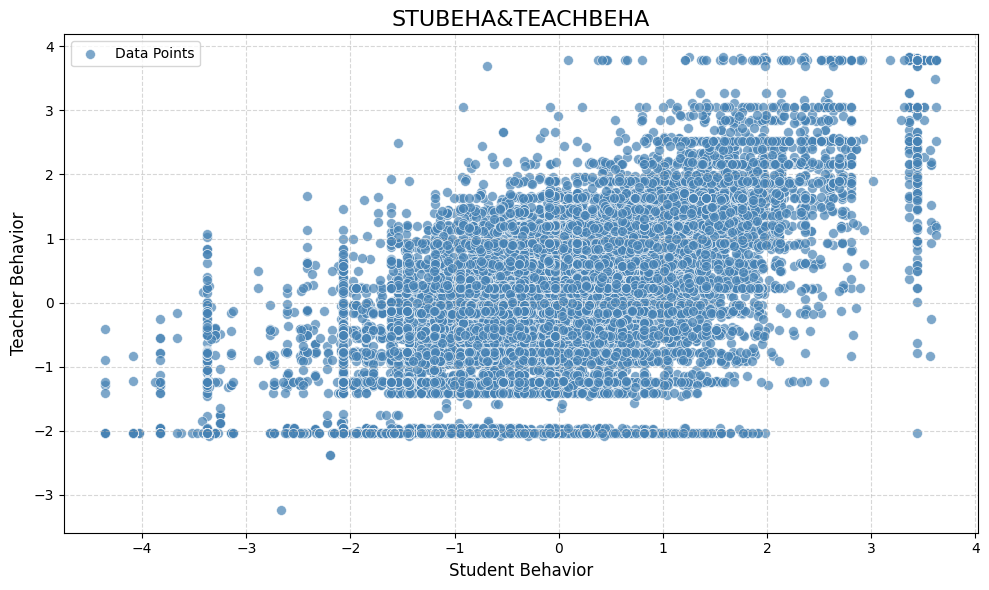

In [46]:
feature_x = 'STUBEHA'
feature_y = 'TEACHBEHA'
plot_data = df[[feature_x, feature_y]].dropna()
print(f'绘制{feature_x}和{feature_y}的分布散点图')
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(
            plot_data[feature_x],      # x轴数据
            plot_data[feature_y],      # y轴数据
            c='steelblue',             # 设置散点颜色
            s=50,                      # 散点大小
            alpha=0.7,                 # 透明度
            edgecolors='w',            # 边缘颜色
            linewidth=0.5,             # 边缘线宽
            label='Data Points'        # 图例标签 
            )
ax.set_title(f'{feature_x}&{feature_y}', fontsize = 16)
ax.set_xlabel(f'Student Behavior', fontsize=12)
ax.set_ylabel(f'Teacher Behavior', fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



#### Q2.（5%）选择一个离散数值型特征（建议所有取值数量不超过10），绘制饼图，要求设置合理配色和比例，并配上合适的标题和图例注记。

C:\Windows\Temp\ipykernel_39656\861449997.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap('Paired')(np.linspace(0, 1, num_color))


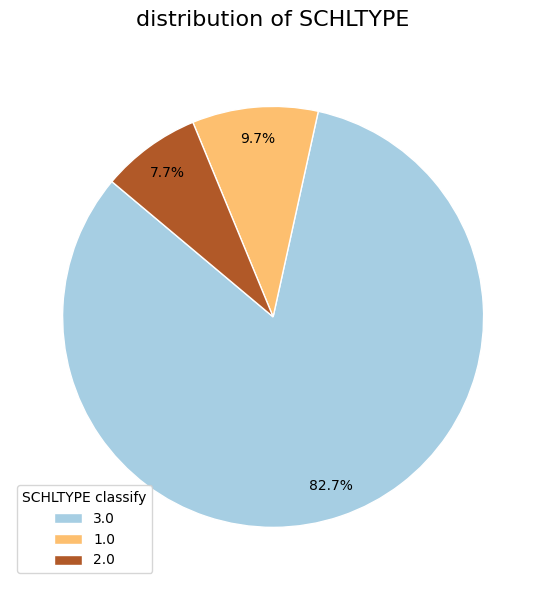

In [47]:
feature_pie = 'SCHLTYPE'
pie_count = df[feature_pie].value_counts()
label = pie_count.index.astype(str)
size = pie_count.values
num_color = len(label)
color = cm.get_cmap('Paired')(np.linspace(0, 1, num_color))
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(
            size,
            autopct='%1.1f%%',
            startangle=140,      
            colors=color,
            pctdistance=0.85,  
            wedgeprops=dict(edgecolor='w', linewidth=1) 
)
ax.set_title(f'distribution of {feature_pie}', fontsize = 16, pad=20)
ax.legend(wedges, label, title=f'{feature_pie} classify')
plt.tight_layout()
plt.show()


#### Q3.（7%）对T1-Q5中的Pearson相关系数矩阵，绘制热力矩阵图，要求为每个位置增添对应数值表示（保留三位小数），设置数值与颜色的对应关系条，并配上合适的标题和坐标表示。

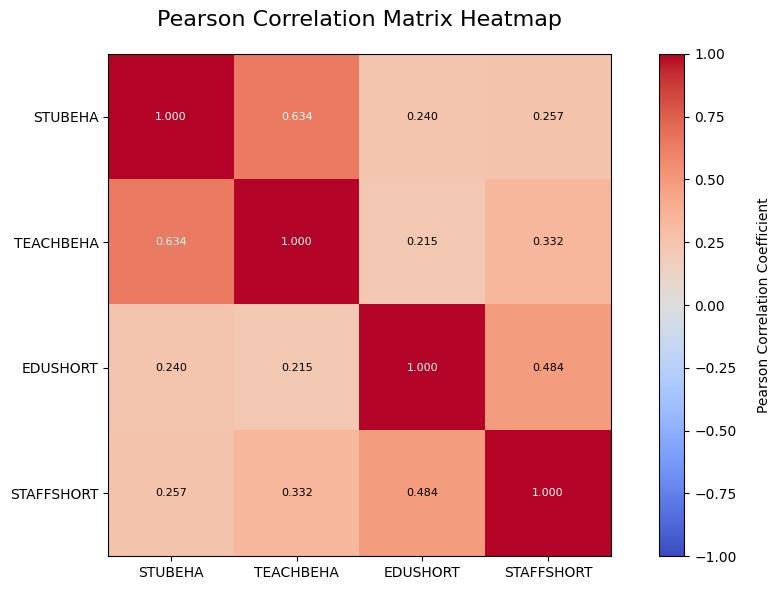

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(corr_matrix.values, cmap='coolwarm', vmin=-1, vmax=1)

color_bar = fig.colorbar(im, ax=ax)
color_bar.set_label('Pearson Correlation Coefficient', labelpad=15)

num_vars = len(corr_matrix.columns)
ax.set_xticks(np.arange(num_vars))
ax.set_yticks(np.arange(num_vars))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

for i in range(num_vars):
    for j in range(num_vars):
        value = corr_matrix.iloc[i, j]
        text_color = "white" if abs(value) > 0.5 else "black"
        text = ax.text(j, i, f"{value:.3f}", 
        ha="center", va="center", color=text_color, fontsize=8) 

ax.set_title("Pearson Correlation Matrix Heatmap", fontsize=16, pad=20)
fig.tight_layout()
plt.show()


### 3.（23%）现欲对数据集特征STUBEHA,TEACHBEHA进行分布校验。执行以下子表提取和缺失记录删除操作,并基于df2完成以下任务：

#### Q1.（6%）以区间数为10，分别绘制两个特征的频数直方图，基于频数直方图的结果，是否可以认为两特征近似服从正态分布？
回答见实验报告

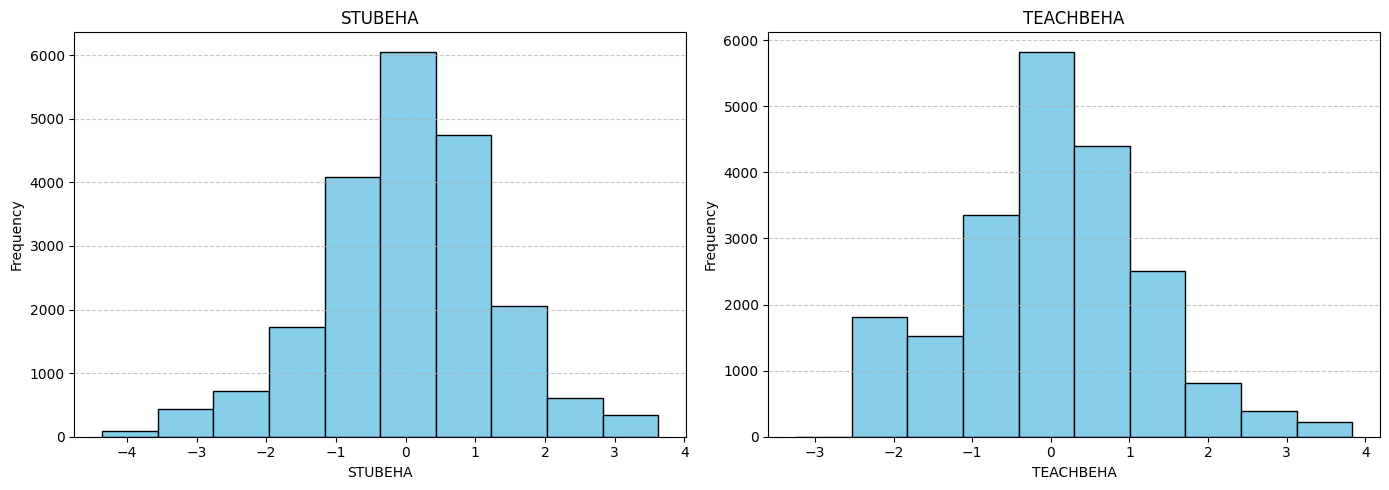

In [49]:
df2 = df[['STUBEHA', 'TEACHBEHA']].dropna()
fig, ax = plt.subplots(1, 2, figsize=(14, 5)) 
feature1 = 'STUBEHA'
ax[0].hist(df2[feature1], bins=10, color='skyblue', edgecolor='black')
ax[0].set_title(f'{feature1}')
ax[0].set_xlabel(feature1)
ax[0].set_ylabel('Frequency')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

feature2 = 'TEACHBEHA'
ax[1].hist(df2[feature2], bins=10, color='skyblue', edgecolor='black')
ax[1].set_title(f'{feature2}')
ax[1].set_xlabel(feature2)
ax[1].set_ylabel('Frequency')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Q2.（8%）分别绘制这两个特征样本的Q-Q图，基于Q-Q图的结果，是否可以认为两特征近似服从正态分布？

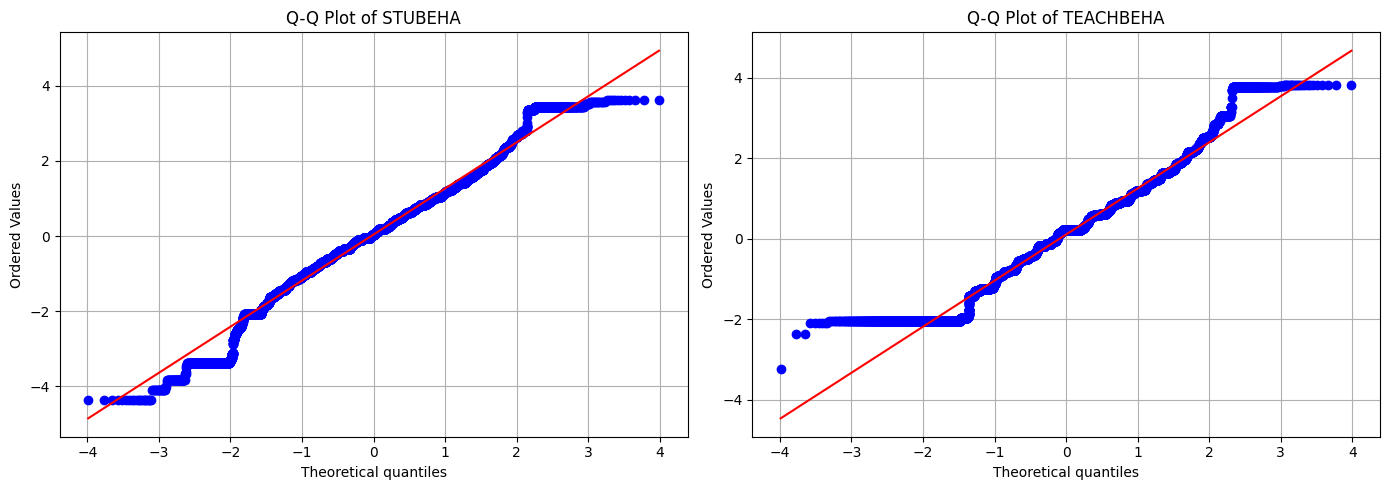

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

feature1 = 'STUBEHA'
stats.probplot(df2[feature1], dist="norm", plot=axes[0])
axes[0].set_title(f'Q-Q Plot of {feature1}')
axes[0].grid(True)

feature2 = 'TEACHBEHA'
stats.probplot(df2[feature2], dist="norm", plot=axes[1])
axes[1].set_title(f'Q-Q Plot of {feature2}')
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### Q3.（9%）特征STUBEHA与TEACHBEHA的理论分布是否具有一致性？请自行编写代码绘制两特征样本的Q-Q图和直线y=x，并基于可视化结果简述你的发现。

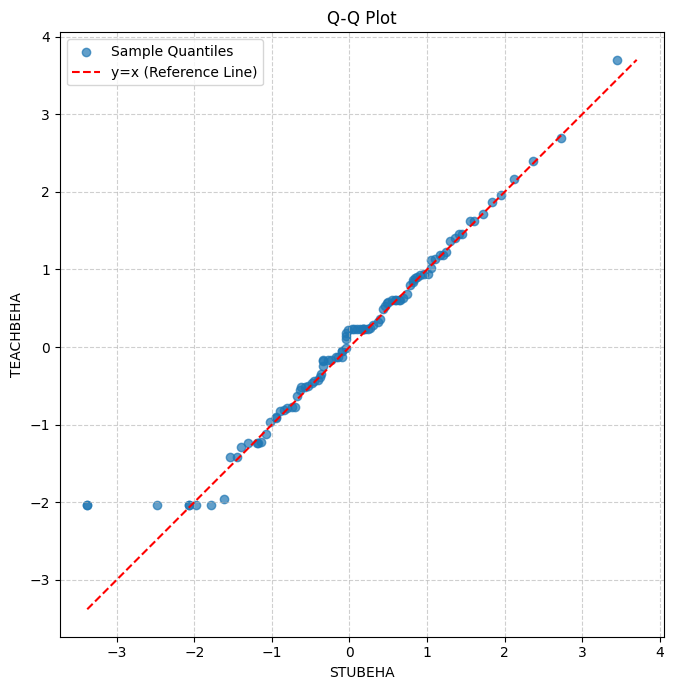

In [51]:
sample1 = df2['STUBEHA'].values
sample2 = df2['TEACHBEHA'].values

percentiles = np.linspace(1, 99, 100) # 从 1% 到 99%

quantiles1 = np.percentile(sample1, percentiles)
quantiles2 = np.percentile(sample2, percentiles)

fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(quantiles1, quantiles2, alpha=0.7, label='Sample Quantiles')

lim_min = min(quantiles1.min(), quantiles2.min())
lim_max = max(quantiles1.max(), quantiles2.max())

ax.plot([lim_min, lim_max], [lim_min, lim_max], color='red', linestyle='--', label='y=x (Reference Line)')

ax.set_title(f'Q-Q Plot')
ax.set_xlabel(f"STUBEHA")
ax.set_ylabel(f"TEACHBEHA")
ax.set_aspect('equal', 'box') # 使 x 和 y 轴比例相同，y=x 线呈45度角
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()

# 6. 显示图形
plt.tight_layout()
plt.show()

### 4.（13%）基于正态分布假设，对特征STUBEHA,TEACHBEHA的总体分布进行参数估计。

#### Q1.（8%）请分别求均值参数和方差参数的极大似然估计。
理论推导请见实验报告

In [52]:
list_student = df['STUBEHA'].dropna().values
list_teacher = df['TEACHBEHA'].dropna().values
mu_1 = np.mean(list_student)
mu_2 = np.mean(list_teacher)
sigma_1 = np.sum((list_student - mu_1) ** 2) / len(list_student)
sigma_2 = np.sum((list_teacher - mu_2) ** 2) / len(list_teacher)
print('利用极大似然估计结果'+'-'*30)
print(f'STUBEHA均值:{mu_1}, 方差:{sigma_1}')
print(f'TEACHBEHA均值:{mu_2}, 方差:{sigma_2}')

利用极大似然估计结果------------------------------
STUBEHA均值:0.04161388103340842, 方差:1.5289359134956648
TEACHBEHA均值:0.10823287441235728, 方差:1.341256978690452


#### Q2.（5%）对该特征进行常数估计 ，求参数的最小二乘解，并比较其与Q1中所得总体均值极大似然估计的结果。
理论推导请见报告

In [53]:
mu_2 = np.mean(list_teacher)
print('利用最小二乘法估计结果'+'-'*30)
print(f'TEACHBEHA常数估计:{mu_2}')

利用最小二乘法估计结果------------------------------
TEACHBEHA常数估计:0.10823287441235728


### 5.（17%）基于T4的假设，现需对特征STUBEHA,TEACHBEHA的总体均值差异进行检验。请阅读本文档的内容，并导入scipy库，完成以下任务：

#### Q1.（5%）简述本情景下应使用成组检验还是成对检验，并写出单侧检验原假设。
见实验报告

#### Q2.（4%）使用scipy.stats中的相关方法，执行相应的假设检验。
根据我们之前得到的数据，我们发现TEACHBEHA的均值更大，所以我们给出的原假设是TEACHBEHA的均值减STUBEHA的均值大于0

In [54]:
stubeha_data = df['STUBEHA']
teachbeha_data = df['TEACHBEHA']
t_stat_less, p_value_less = stats.ttest_rel(
        stubeha_data,
        teachbeha_data,
        alternative='less',
        nan_policy='omit'
)
print(f"对原假设H0为STUBEHA>TEACHBEHA进行成对假设"+'-'*30)
print(f"P-value: {p_value_less}")

对原假设H0为STUBEHA>TEACHBEHA进行成对假设------------------------------
P-value: 2.4682470543872093e-21


Q3, Q4见实验报告